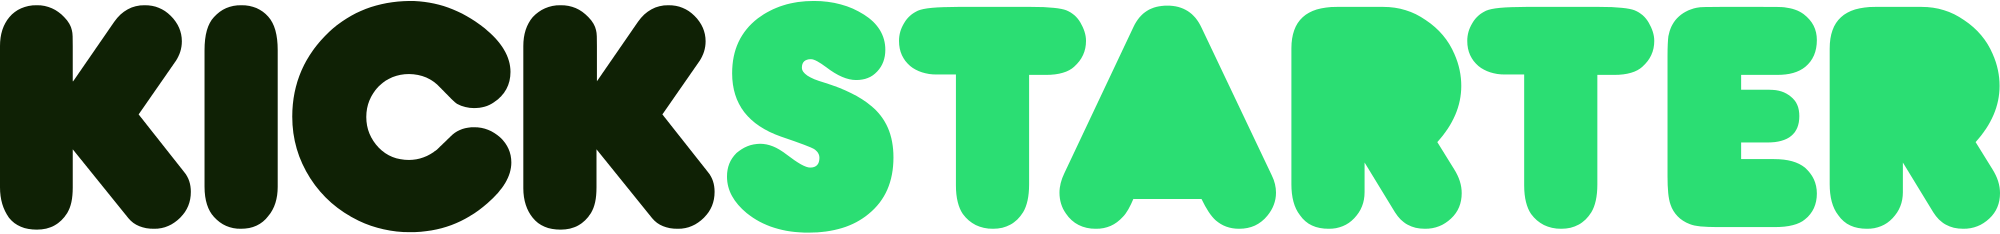

In [1]:
import pandas as pd
%matplotlib inline
#import pylab as plt
import numpy as np
import scipy as sc
import scipy.stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./kickstarter_data_full.csv', sep=',')
df.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,id,photo,name,blurb,goal,pledged,state,slug,disable_communication,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend
0,0,1454391034,"{""small"":""https://ksr-ugc.imgix.net/assets/011...",Auntie Di's Music Time Sign ASL for Hearing an...,MTS ASL Curriculum Workbook is a reproducible ...,1500.0,0.0,failed,auntie-dis-music-time-sign-asl-for-hearing-and...,False,...,36 days 20:47:24.000000000,36 days 20:47:24.000000000,17,36,36,0,1,1,0,0
1,1,1655206086,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Jump Start Kindergarten Toolkit,"This kit teaches how to print, correct an ugly...",500.0,0.0,failed,jump-start-kindergarten-toolkit,False,...,60 days 00:00:00.000000000,60 days 00:00:02.000000000,10,60,60,0,1,1,0,0
2,2,311581827,"{""small"":""https://ksr-ugc.imgix.net/assets/012...",Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,"Establishing a free, world-class, public libra...",100000.0,120.0,failed,ojukwu-balewa-awolowo-oba-public-library-of-ni...,False,...,60 days 00:00:00.000000000,60 days 00:00:01.000000000,1,60,60,0,1,1,0,0
3,3,859724515,"{""small"":""https://ksr-ugc.imgix.net/assets/011...","MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",Goal: Introducing a new word into the English ...,5000.0,0.0,failed,mastize-mas-tahyz-mas-tahyz-to-spread,False,...,30 days 00:00:00.000000000,30 days 00:00:00.000000000,0,30,30,0,1,1,0,0
4,4,1613604977,"{""small"":""https://ksr-ugc.imgix.net/assets/012...","Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",Zu den Artikeln der DSGVO sind die korrespondi...,3222.0,356.0,failed,synopse-der-eu-dsgvo-artikel-erwagungsgrunde-bdsg,False,...,32 days 06:02:33.000000000,32 days 06:02:33.000000000,0,32,32,0,0,0,0,0


In [3]:
df = df.drop(['photo', 'blurb', 'slug', 'disable_communication', 'currency_symbol', 
              'currency_trailing_code', 'USorGB', 'TOPCOUNTRY', 'deadline', 'blurb_len_clean', 'state_changed_at_weekday', 
             'deadline_day', 'deadline_hr', 'LaunchedTuesday', 'DeadlineWeekend', 'SuccessfulBool', 
              'launch_to_deadline_days', 'launch_to_state_change', 'create_to_launch', 'launched_at_hr'], axis=1)
df.head()


,Unnamed: 0,id,name,goal,pledged,state,country,currency,state_changed_at,created_at,...,created_at_month,created_at_day,created_at_yr,created_at_hr,launched_at_month,launched_at_day,launched_at_yr,launch_to_deadline,create_to_launch_days,launch_to_state_change_days
0,0,1454391034,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,0.0,failed,US,USD,1/23/15 10:35,11/29/14 22:55,...,11,29,2014,22,12,17,2014,36 days 20:47:24.000000000,17,36
1,1,1655206086,Jump Start Kindergarten Toolkit,500.0,0.0,failed,US,USD,5/1/15 16:13,2/20/15 9:28,...,2,20,2015,9,3,2,2015,60 days 00:00:00.000000000,10,60
2,2,311581827,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,100000.0,120.0,failed,US,USD,3/26/15 8:17,1/24/15 0:08,...,1,24,2015,0,1,25,2015,60 days 00:00:00.000000000,1,60
3,3,859724515,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",5000.0,0.0,failed,US,USD,10/6/14 0:41,9/5/14 22:30,...,9,5,2014,22,9,6,2014,30 days 00:00:00.000000000,0,30
4,4,1613604977,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",3222.0,356.0,failed,DE,EUR,6/27/16 12:00,5/25/16 14:09,...,5,25,2016,14,5,26,2016,32 days 06:02:33.000000000,0,32


In [4]:
df = df.rename(index=str, columns={"launch_to_state_change_days": "duration_of_project", "create_to_launch_days": 
                                   "preparation_period", "launched_at_year" : "year_launched", "launched_at_day" : "day_of_month", 
                                  "launched_at_month" : "month_launched", "created_at_hr" : "hour_of_day_launched", "created_at_day":
                                  "day_of_month_created", "created_at_month": "month_created"})
df

,Unnamed: 0,id,name,goal,pledged,state,country,currency,state_changed_at,created_at,...,month_created,day_of_month_created,created_at_yr,hour_of_day_launched,month_launched,day_of_month,launched_at_yr,launch_to_deadline,preparation_period,duration_of_project
0,0,1454391034,Auntie Di's Music Time Sign ASL for Hearing an...,1500.0,0.0,failed,US,USD,1/23/15 10:35,11/29/14 22:55,...,11,29,2014,22,12,17,2014,36 days 20:47:24.000000000,17,36
1,1,1655206086,Jump Start Kindergarten Toolkit,500.0,0.0,failed,US,USD,5/1/15 16:13,2/20/15 9:28,...,2,20,2015,9,3,2,2015,60 days 00:00:00.000000000,10,60
2,2,311581827,Ojukwu Balewa Awolowo (O.B.A.) Public Library ...,100000.0,120.0,failed,US,USD,3/26/15 8:17,1/24/15 0:08,...,1,24,2015,0,1,25,2015,60 days 00:00:00.000000000,1,60
3,3,859724515,"MASTIZE - [mas-TAHYZ, MAS-tahyz] - to spread",5000.0,0.0,failed,US,USD,10/6/14 0:41,9/5/14 22:30,...,9,5,2014,22,9,6,2014,30 days 00:00:00.000000000,0,30
4,4,1613604977,"Synopse der EU-DSGVO - Artikel, Erwägungsgründ...",3222.0,356.0,failed,DE,EUR,6/27/16 12:00,5/25/16 14:09,...,5,25,2016,14,5,26,2016,32 days 06:02:33.000000000,0,32
5,5,808486483,Shadow School Board - Reforming Texas School B...,13000.0,1136.0,failed,US,USD,11/20/15 10:28,10/19/15 7:24,...,10,19,2015,7,10,21,2015,30 days 00:00:00.000000000,2,30
6,6,883246296,"Research in HIV prevention, treatment, and aid",50000.0,0.0,failed,US,USD,5/29/15 22:12,4/29/15 20:57,...,4,29,2015,20,4,29,2015,30 days 00:00:00.000000000,0,30
7,7,242834615,Cardinal Investment Club,10000.0,0.0,failed,US,USD,9/27/15 10:36,8/13/15 9:22,...,8,13,2015,9,8,13,2015,45 days 00:00:00.000000000,0,45
8,8,2079785043,V.I.P.-Architecture,6000.0,153.0,failed,DE,EUR,3/8/16 5:46,2/5/16 10:50,...,2,5,2016,10,2,7,2016,30 days 00:00:00.000000000,1,30
9,9,1624645868,Collected Works of Ross Wells,15000.0,0.0,failed,US,USD,12/2/15 17:19,11/1/15 9:02,...,11,1,2015,9,11,2,2015,30 days 00:00:00.000000000,1,30
